# Housing Prices Forecasting (ML Project ) 

# Using Linear Regression Model

- Import Packages

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

- Import and Inspect Data

In [6]:
df = pd.read_csv('USA_Housing.csv')

In [4]:
df.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
df.shape

(5000, 7)

In [6]:
df.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [25]:
df.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [26]:
df.duplicated().sum()

0

- Exploratory Data Analysis

In [9]:
df.describe().round(1)

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.0,5000.0,5000.0,5000.0,5000.0,5000.0
mean,68583.1,6.0,7.0,4.0,36163.5,1232072.7
std,10658.0,1.0,1.0,1.2,9925.7,353117.6
min,17796.6,2.6,3.2,2.0,172.6,15938.7
25%,61480.6,5.3,6.3,3.1,29403.9,997577.1
50%,68804.3,6.0,7.0,4.0,36199.4,1232669.4
75%,75783.3,6.7,7.7,4.5,42861.3,1471210.2
max,107701.7,9.5,10.8,6.5,69621.7,2469065.6


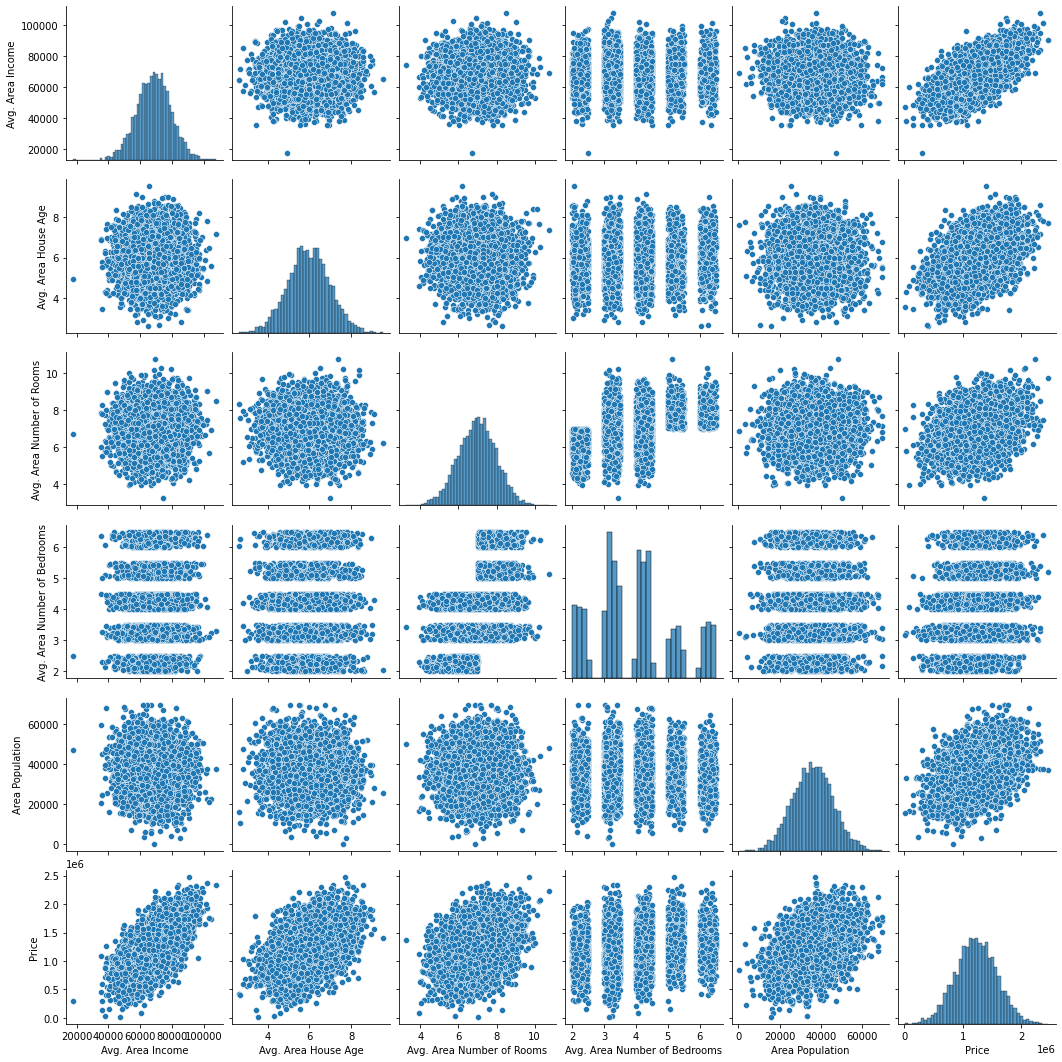

In [10]:
sns.pairplot(df)

<AxesSubplot: xlabel='Price', ylabel='Density'>

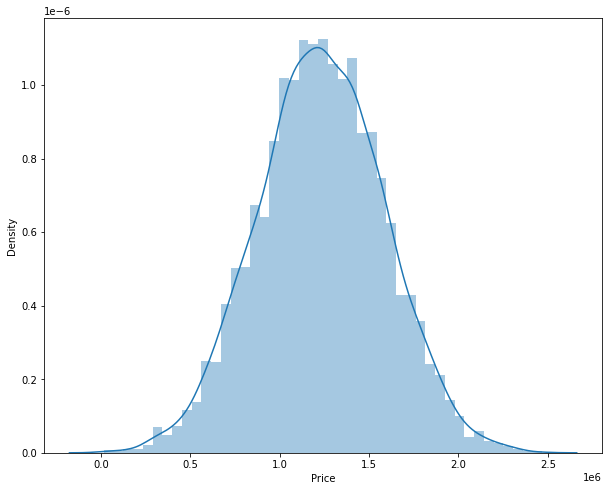

In [21]:
plt.figure(figsize=(10,8))
sns.distplot(df['Price'])

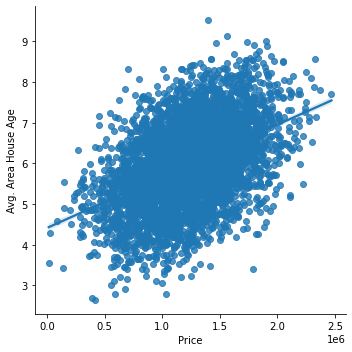

In [36]:
sns.lmplot(data=df,x='Price',y='Avg. Area House Age')

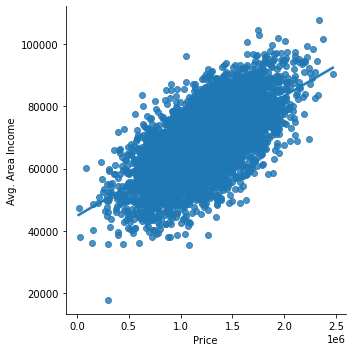

In [39]:
sns.lmplot(data=df,x='Price',y='Avg. Area Income')

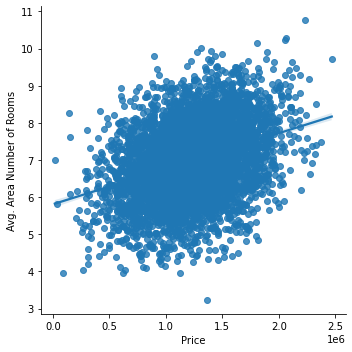

In [40]:
sns.lmplot(data=df,x='Price',y='Avg. Area Number of Rooms')

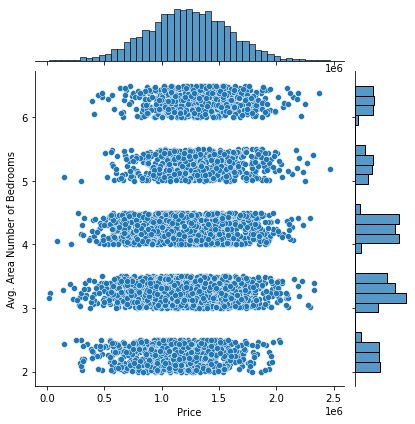

In [44]:
sns.jointplot(data=df,x='Price',y='Avg. Area Number of Bedrooms')

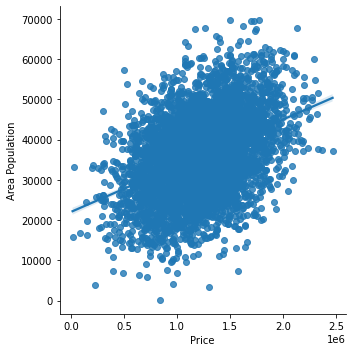

In [43]:
sns.lmplot(data=df,x='Price',y='Area Population')

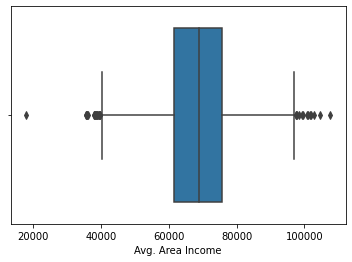

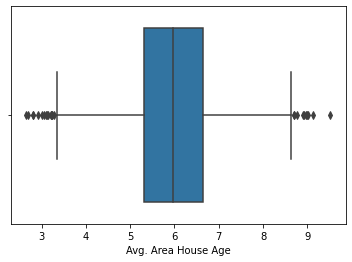

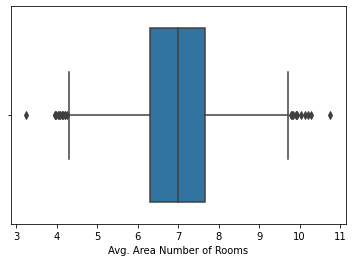

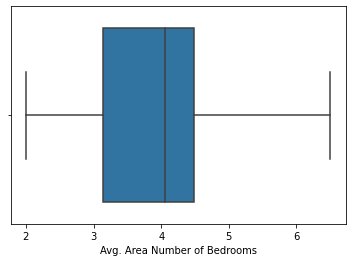

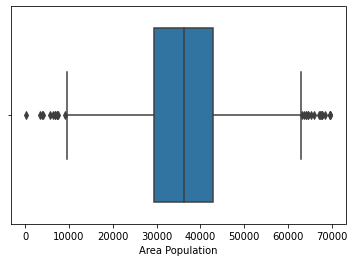

In [27]:
def drawBoxPlot(col):
    sns.boxplot(x =df[col])
    plt.show()

numerical_columns =  list(df.select_dtypes(exclude=['object']))
for col in numerical_columns:
    if col != 'Price': drawBoxPlot(col)

<AxesSubplot: >

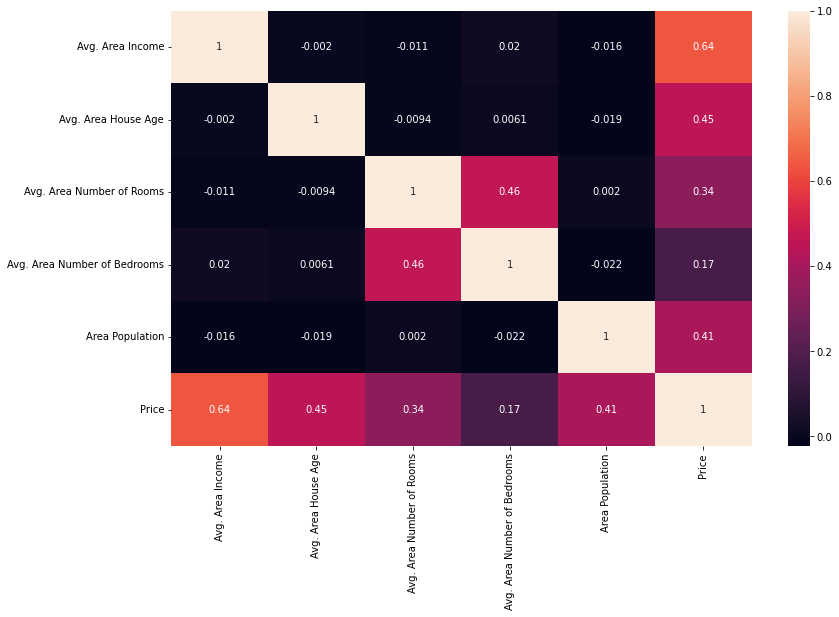

In [23]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(),annot=True)

- Build Model

In [7]:
X = df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [8]:
y = df['Price']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [10]:
lm = LinearRegression()

In [11]:
lm.fit(X_train,y_train)

LinearRegression()

In [12]:
print(lm.intercept_)

-2647617.0723030404


In [13]:
lm.coef_

array([2.16426796e+01, 1.65227890e+05, 1.21886319e+05, 1.44672540e+03,
       1.52409213e+01])

- Make and Check Predictions

In [14]:
predictions = lm.predict(X_test)

In [22]:
predictions

array([1259282.12263079,  822818.45700858, 1742975.9651685 , ...,
       1191347.50002143,  870205.03124796,  699724.22351201])

In [27]:
y_test

1718    1.251689e+06
2511    8.730483e+05
345     1.696978e+06
2521    1.063964e+06
54      9.487883e+05
            ...     
1254    1.587406e+06
3423    9.388278e+05
3946    1.242317e+06
3299    1.017723e+06
1219    8.429246e+05
Name: Price, Length: 1650, dtype: float64

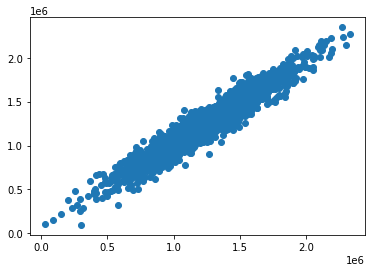

In [28]:
plt.scatter(y_test,predictions)

<AxesSubplot: xlabel='Price', ylabel='Density'>

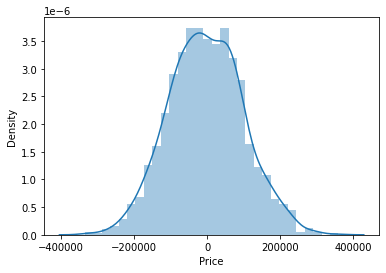

In [29]:
sns.distplot(y_test-predictions)

- Evaluate The Model 

In [22]:
metrics.mean_absolute_error(y_test,predictions)

81778.67738370101

In [23]:
metrics.mean_squared_error(y_test,predictions)

10331657030.971087

In [24]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

101644.75899411188

- Conculation

In [34]:
pd.DataFrame(lm.coef_.round(3),X.columns,columns=(['Coeff']))

,Coeff
Avg. Area Income,21.643
Avg. Area House Age,165227.890
Avg. Area Number of Rooms,121886.319
Avg. Area Number of Bedrooms,1446.725
Area Population,15.241
